In [1]:
import requests as rq
import re
from bs4 import BeautifulSoup as bbs
import matplotlib.pyplot as plt

In [2]:
def data_extract():
    baseurl = 'http://www.kuet.ac.bd/index.php/welcome/studentlist'
    res = rq.get(baseurl)
    page = bbs(res.text, 'html.parser')

    data = {}
    for i in page.findAll('tr')[2:]:
        val = [j.text for j in i.findAll('td')]
        try:
            int(val[1])
        except:
            val = val[1:]
        if val[3] == '0':
            continue
        elif len(val) != 8:
            start = 0
            for k in range(len(val)//8):
                val1 = val[start:start+8]
                val1[1] = val1[1].replace('\u202c', '').replace('\u202d', '')
                val1[2] = val1[2].replace('\u202c', '').replace('\u202d', '')
                val1[1:3] = map(int, val1[1:3])
                data[val1[0]] = {}
                data[val1[0]]['male'] = val1[1]
                data[val1[0]]['female'] = val1[2]
                name=val[0].split()
                data[val[0]]['short'] = name[2] if name[0]=='Department' else name[0]
                start = (k+1)*8
        else:
            val[1] = val[1].replace('\u202c', '').replace('\u202d', '')
            val[2] = val[2].replace('\u202c', '').replace('\u202d', '')
            val[1:3] = map(int, val[1:3])
            data[val[0]] = {}
            data[val[0]]['male'] = val[1]
            data[val[0]]['female'] = val[2]
            name=val[0].split()
            data[val[0]]['short'] = name[2] if name[0]=='Department' else name[0]
    del data['Grand Total']
    try:
        val = page.findAll('p')[-1].text
        time_val = '('+' '.join(val.split(' ')[2:])+')'
    except:
        time_val = ""
    return data, time_val


def data_plot(data,time_val, save=True):
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)

    total = []
    male = []
    female = []
    short = []

    for i in data.keys():
        total.append(data[i]['male']+data[i]['female'])
        male.append(data[i]['male']/total[-1])
        female.append(data[i]['female']/total[-1])
        short.append(data[i]['short'])

    plt.bar(short, male, bottom=female, color='tomato',
            edgecolor='white', label='Boys')
    plt.bar(short, female, color='purple', edgecolor='white', label='Girls')

    plt.xlabel("Department Name", fontsize=25)
    plt.ylabel('Student Number in Percentage', fontsize=25)
    plt.title('Percentage of Boys & Girls in KUET '+time_val, fontsize=25)

    ax.set_yticklabels([0,20,40,60,80,100])
    xtickNames = ax.set_xticklabels(short)

    ax.legend(fontsize=30)
    plt.setp(xtickNames, rotation=30, fontsize=15)
    if save:
        plt.savefig('Kuet Boys Vs Girls')
    plt.show()

In [3]:
data, time_val = data_extract()

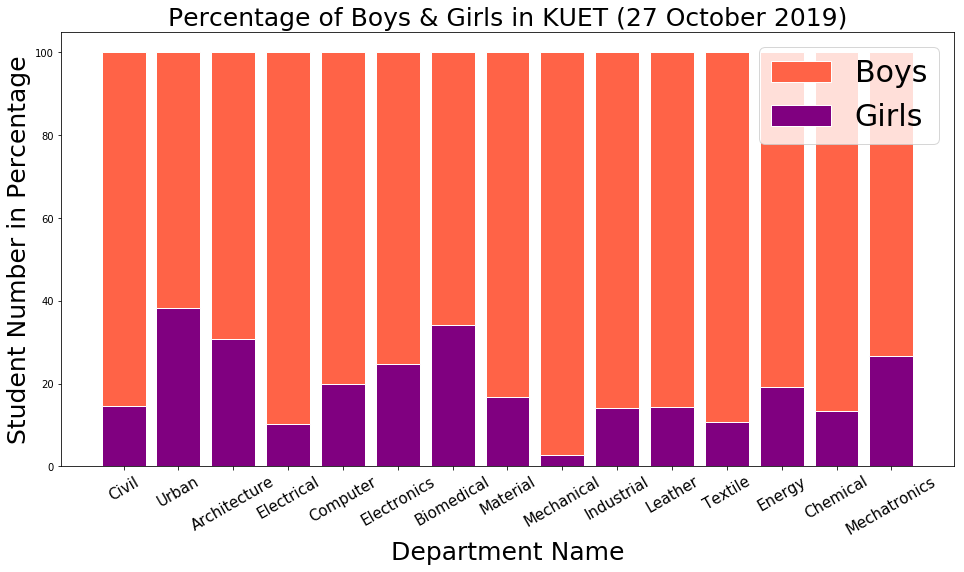

In [4]:
data_plot(data, time_val)